In [1]:
from PIL import Image
import numpy as np
import random
import cv2 as cv
import matplotlib.pyplot as plt
from ImageProcessor import ImageProcessor
import os
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

# 读取50张clean jpg图片
image_path = './clean_photos'
ImageProcessor = ImageProcessor(image_path, 50)
ImageProcessor.read_images()

# 随机的噪声污染这些图片
# 现在污染噪声的类型分为三种：椒盐噪声、高斯噪声、泊松噪声；10张图片只添加椒盐噪声，10张图片只添加高斯噪声，10张图片只添加泊松噪声，20张图片添加椒盐噪声、高斯噪声和泊松噪声
for i in range(10):
    salt_prob = random.random() * 0.01
    pepper_prob = random.random() * 0.01
    ImageProcessor.add_salt_pepper_noise(i, salt_prob, pepper_prob)


for i in range(10, 20):
    mean = 0
    sigma = random.uniform(0,10)
    ImageProcessor.add_gaussian_noise(i,mean,sigma)


for i in range(20, 30):
    ImageProcessor.add_poisson_noise(i)


for i in range(30, 50):
    salt_prob = random.random() * 0.01
    pepper_prob = random.random() * 0.01 
    mean = 0
    sigma = random.uniform(0,10)
    ImageProcessor.add_all_noises(i,salt_prob,pepper_prob,mean,sigma)

In [2]:
'''# PGD去噪
t = 0.01 # 步长
ii = 18
ep = 1e-5
lam = 0.1
ImageProcessor.noisy_images[ii].show()

denoised_image = ImageProcessor.PGD_denoising(ii, lam,t,ep)
plt.imshow(denoised_image)
plt.title(f'PGD Denoising with λ={lam}')
plt.axis('off')  # 隐藏坐标轴
plt.show()'''

"# PGD去噪\nt = 0.01 # 步长\nii = 18\nep = 1e-5\nlam = 0.1\nImageProcessor.noisy_images[ii].show()\n\ndenoised_image = ImageProcessor.PGD_denoising(ii, lam,t,ep)\nplt.imshow(denoised_image)\nplt.title(f'PGD Denoising with λ={lam}')\nplt.axis('off')  # 隐藏坐标轴\nplt.show()"

In [3]:
# PGD去噪
lam = 0.1
t = 0.01
ep = 1e-5
PGD_denoising_result = []
for i in range(50):
    PGD_denoising_result.append(ImageProcessor.PGD_denoising(i, lam, t, ep))

迭代次数为1013,误差为9.90580864605551e-06
迭代次数为1013,误差为9.911867783534847e-06
迭代次数为1013,误差为9.92050659466839e-06
迭代次数为1012,误差为9.995635433390152e-06
迭代次数为1013,误差为9.905513058707505e-06
迭代次数为1013,误差为9.922498780726193e-06
迭代次数为1012,误差为9.972515581100664e-06
迭代次数为1013,误差为9.93437121182733e-06
迭代次数为1012,误差为9.968319799412338e-06
迭代次数为1012,误差为9.941605484059531e-06
迭代次数为1012,误差为9.975361456728884e-06
迭代次数为1011,误差为9.9561182386346e-06
迭代次数为1013,误差为9.941886351200716e-06
迭代次数为1012,误差为9.983446143711492e-06
迭代次数为1013,误差为9.935108640473073e-06
迭代次数为1013,误差为9.941518062392237e-06
迭代次数为1011,误差为9.910771093711132e-06
迭代次数为990,误差为9.914946012313331e-06
迭代次数为1005,误差为9.989653004830878e-06
迭代次数为1013,误差为9.928990077874151e-06
迭代次数为1013,误差为9.94159152275028e-06
迭代次数为1013,误差为9.908986669408135e-06
迭代次数为1013,误差为9.931644308141018e-06
迭代次数为1013,误差为9.941664999893512e-06
迭代次数为1004,误差为9.979789983407084e-06
迭代次数为1009,误差为9.928528282266786e-06
迭代次数为1003,误差为9.943622781384683e-06
迭代次数为1011,误差为9.968206630624229e-06
迭代次数为1013,误差为9.919694507987

In [4]:
# ADMM去噪
AMDD_denoising_result = []
lam = 80
t1 = 0.01
t2 = 0.01
for i in range(50):
    AMDD_denoising_result.append(ImageProcessor.ADMM_denoising(i, lam, t1, t2, alpha_k=0.1))


迭代次数为1123,误差为0.00099511965343853
迭代次数为1103,误差为0.000996830491311969
迭代次数为1110,误差为0.0009978229406653355
迭代次数为1078,误差为0.0009954432148608762
迭代次数为1099,误差为0.0009944074669222386
迭代次数为1159,误差为0.0009967195696895456
迭代次数为1086,误差为0.0009959003874158924
迭代次数为1161,误差为0.0009988249795860043
迭代次数为1089,误差为0.000993763216152333
迭代次数为1111,误差为0.000997241623243396
迭代次数为1012,误差为0.000991690137258696
迭代次数为1086,误差为0.0009943764432330366
迭代次数为1054,误差为0.000990713751104762
迭代次数为1105,误差为0.000995725589694524
迭代次数为1110,误差为0.0009928702296833054
迭代次数为1066,误差为0.0009904763165336768
迭代次数为1036,误差为0.0009893645146351526
迭代次数为1028,误差为0.000995251364086432
迭代次数为1097,误差为0.0009940930631107121
迭代次数为1106,误差为0.0009978392543257642
迭代次数为1140,误差为0.0009888181222776208
迭代次数为1108,误差为0.0009940655689707196
迭代次数为1097,误差为0.000994592568464477
迭代次数为1130,误差为0.000997890418132178
迭代次数为1036,误差为0.0009944276453077233
迭代次数为1113,误差为0.000997808030438883
迭代次数为1061,误差为0.0009929638347745474
迭代次数为1086,误差为0.0009950737506430757
迭代次数为1074,误差为0.00099482945958084

In [5]:
# 进行PSNR分析
PGD_psnr = []
ADMM_psnr = []
for i in range(50):
    PGD_psnr.append(compare_psnr(np.array(ImageProcessor.clean_images[i]), np.array(PGD_denoising_result[i])))
    ADMM_psnr.append(compare_psnr(np.array(ImageProcessor.clean_images[i]), np.array(AMDD_denoising_result[i])))

In [6]:
# 进行SSIM分析
PGD_ssim = []
ADMM_ssim = []
for i in range(50):
    PGD_ssim.append(compare_ssim(np.array(ImageProcessor.clean_images[i]), np.array(PGD_denoising_result[i]), channel_axis=-1))
    ADMM_ssim.append(compare_ssim(np.array(ImageProcessor.clean_images[i]), np.array(AMDD_denoising_result[i]), channel_axis=-1))

C:\Users\DELL\AppData\Local\Temp\ipykernel_28408\531585214.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([PGD_psnr[:50], ADMM_psnr[:50]],


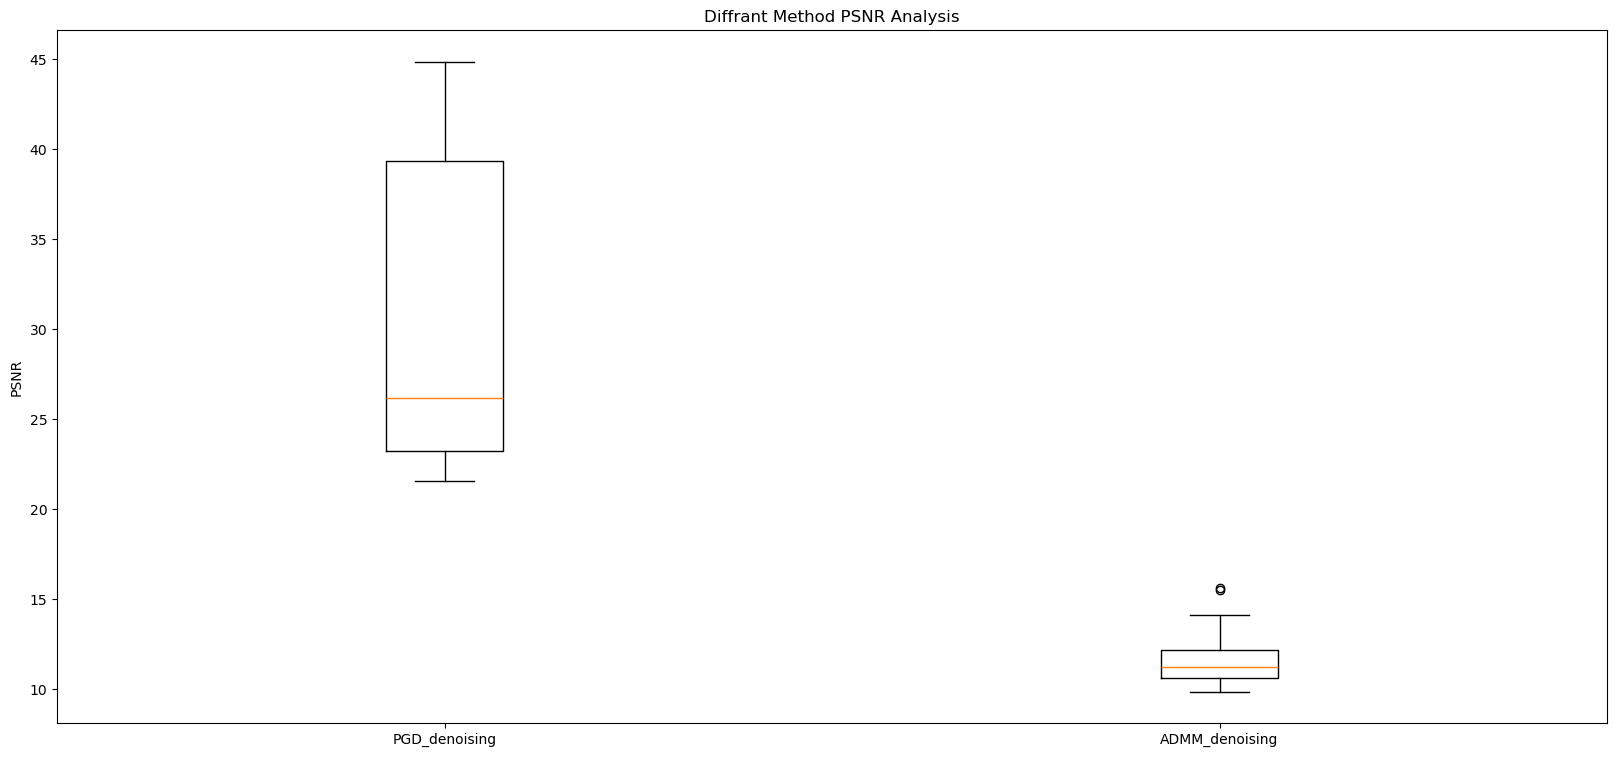

C:\Users\DELL\AppData\Local\Temp\ipykernel_28408\531585214.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([PGD_ssim[:50], ADMM_ssim[:50]],


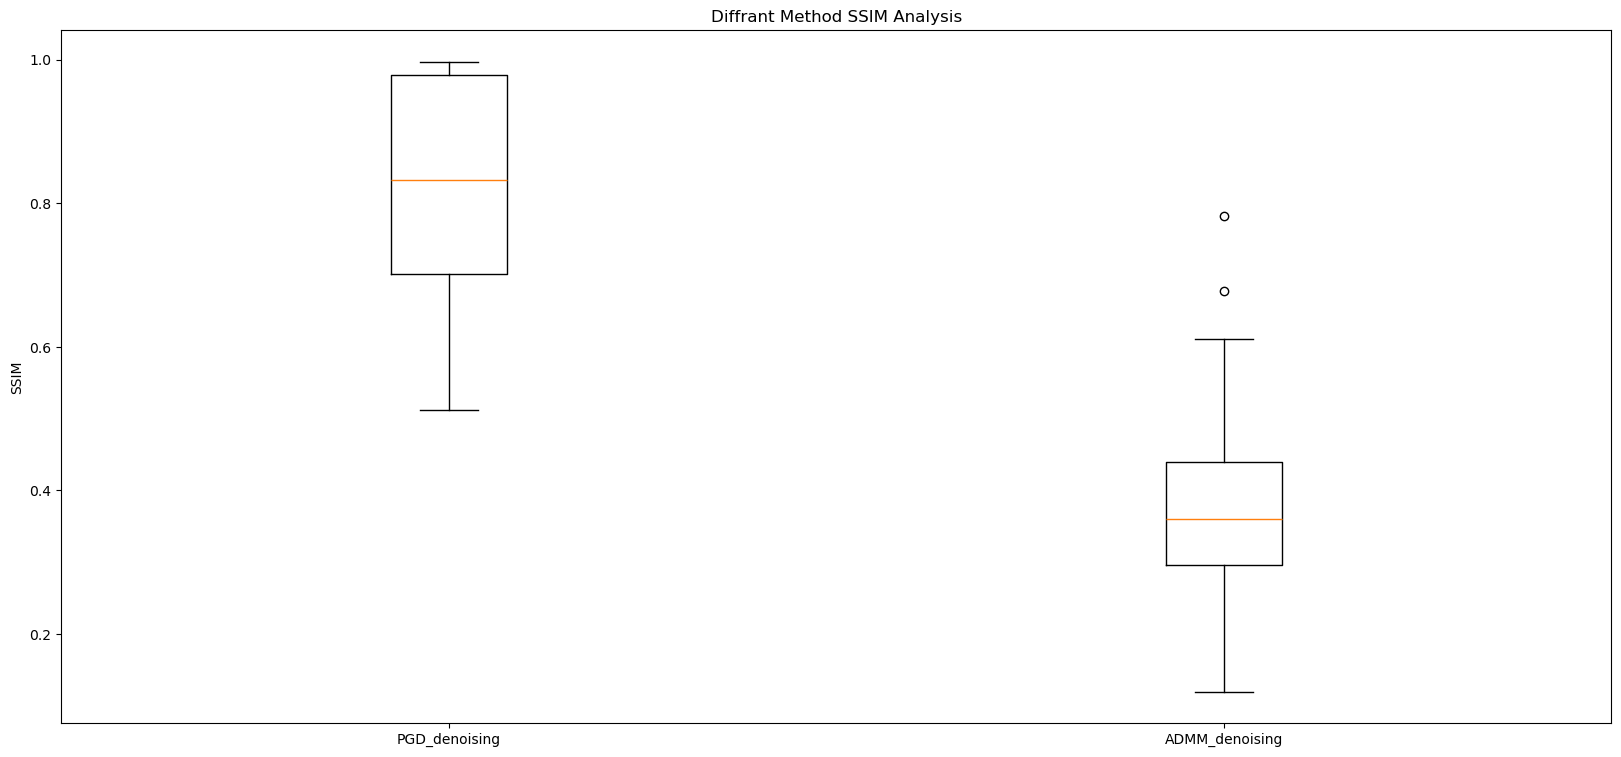

In [7]:
# 不同降噪方法的PSNR和SSIM分析
plt.figure(figsize=(20, 9))
plt.boxplot([PGD_psnr[:50], ADMM_psnr[:50]],
            labels=['PGD_denoising', 'ADMM_denoising'])
plt.title('Diffrant Method PSNR Analysis')
plt.ylabel('PSNR')
plt.show()

plt.figure(figsize=(20, 9))
plt.boxplot([PGD_ssim[:50], ADMM_ssim[:50]],
            labels=['PGD_denoising', 'ADMM_denoising'])
plt.title('Diffrant Method SSIM Analysis')
plt.ylabel('SSIM')
plt.show()